In [6]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import truvari
import joblib

In [4]:
files = [('original', 'smaht.sv.v2.hard.vcf.gz.jl'),
         ('noSNP', 'smaht.sv.v2.medium.nosmall.vcf.gz.jl'),
         ('5bp∆', 'smaht.sv.v2.easy.nosmall.vcf.gz.jl')]

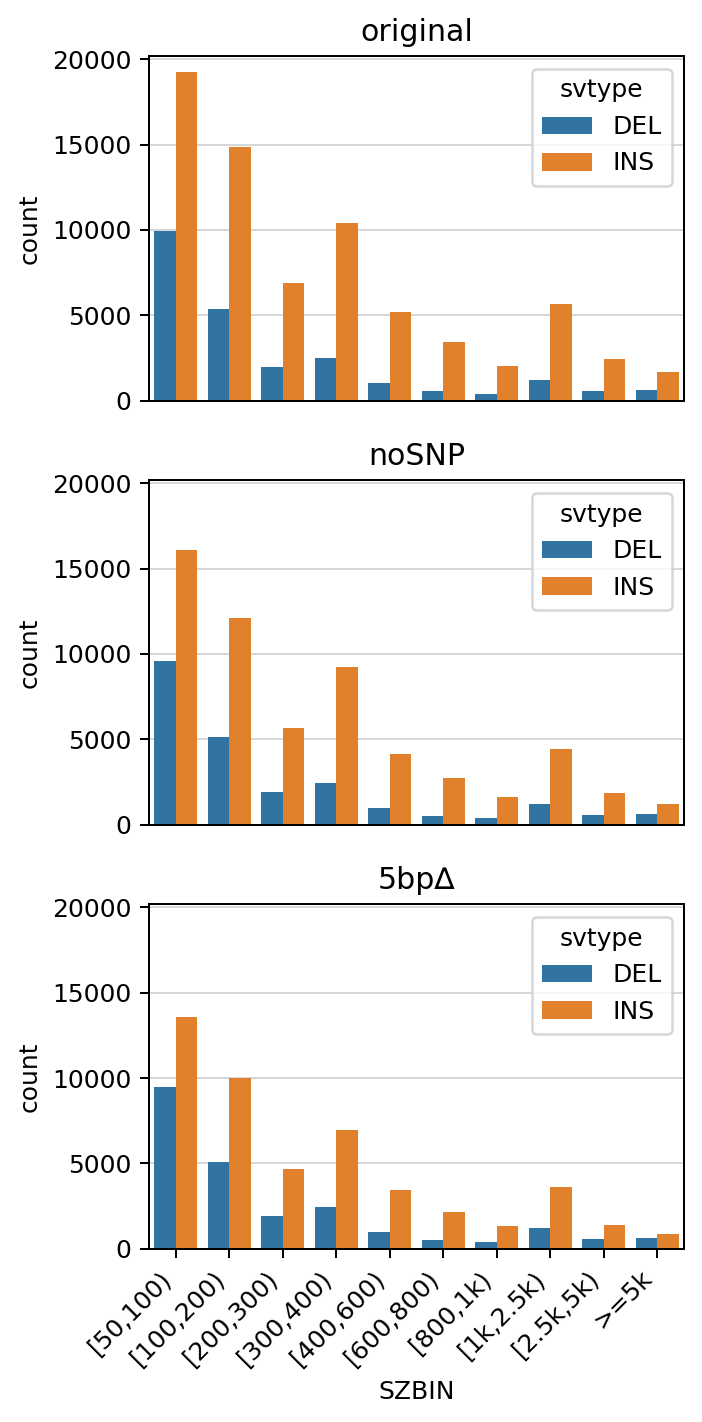

In [13]:

fig, ax = plt.subplots(nrows=3, 
                   ncols=1, 
                   figsize=(4, 8), 
                   squeeze=False,
                   #sharex=True,
                   sharey=True,
                   dpi=180,
                  )

cnts = []
for i, fn in enumerate(files):
    title, fn = fn
    data = joblib.load(fn)
    c = data['svtype'].value_counts()
    cnts.append([title, len(data), c['DEL'], c['INS']])
    p = sb.countplot(data=data, x='szbin',
                    order=truvari.SZBINS[8:],
                    hue='svtype', 
                    ax = ax[i][0], 
                    hue_order=['DEL', 'INS'], 
                    alpha=1, zorder=2)
    #p.xticks(rotation=45, ha='right', ax=ax[i][0])
    if title != '5bp∆':
        p.set_xticks([])
        l = ""
    else:
        l = 'SZBIN'
    p.set(title=title, xlabel=l)
    p.grid(alpha=0.5, axis='y', zorder=1)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
cnts = pd.DataFrame(cnts, columns=['VCF', 'SV Count', 'DEL', 'INS'])

In [14]:
cnts

,VCF,SV Count,DEL,INS
0,original,95938,24121,71817
1,noSNP,82510,23365,59145
2,5bp∆,71196,23167,48029


In [20]:
!bcftools query -R ../benchmark_v2/smaht_mims_sv_v2_hard_nodenseregions.bed -i "SVLEN >= 50" -f "%SVTYPE,%VAF\n" ../benchmark_v2/smaht_mims_sv_v2_hard.vcf.gz  | cut -f1,3 -d, > hard.txt
!bcftools query -R ../benchmark_v2/smaht_mims_sv_v2_easy_nodenseregions.bed  -i "SVLEN >= 50" -f "%SVTYPE,%VAF\n" ../benchmark_v2/smaht_mims_sv_v2_easy.vcf.gz  | cut -f1,3 -d, > easy.txt

In [25]:
!bcftools query -R ../benchmark_v2/smaht_mims_sv_v2_hard_fullregions.bed -i "SVLEN >= 50" -f "%SVTYPE,%VAF\n" ../benchmark_v2/smaht_mims_sv_v2_hard.vcf.gz  | cut -f1,3 -d, > hard.txt
!bcftools query -R ../benchmark_v2/smaht_mims_sv_v2_easy_fullregions.bed  -i "SVLEN >= 50" -f "%SVTYPE,%VAF\n" ../benchmark_v2/smaht_mims_sv_v2_easy.vcf.gz  | cut -f1,3 -d, > easy.txt

In [26]:
hard = pd.read_csv("hard.txt", names=["SVTYPE", 'VAF'], sep=',')
easy = pd.read_csv("easy.txt", names=["SVTYPE", 'VAF'], sep=',')

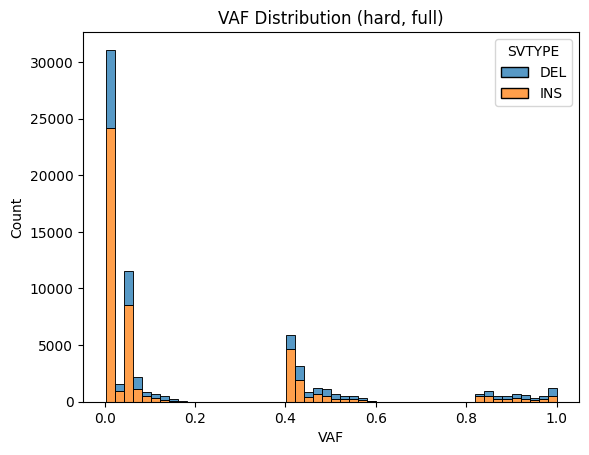

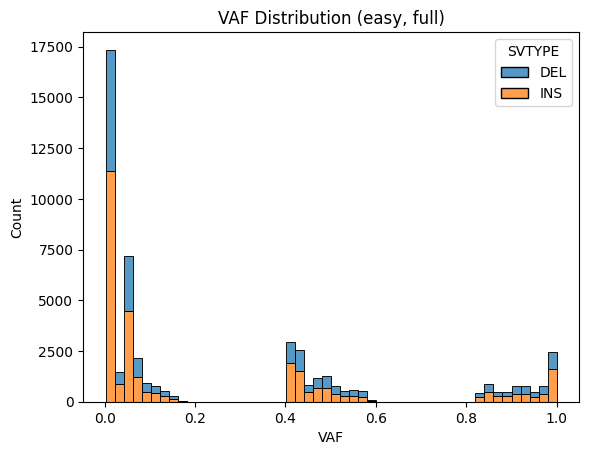

In [28]:
p = sb.histplot(data=hard, x='VAF', hue='SVTYPE', hue_order=['DEL', 'INS'],
           multiple='stack', binwidth=0.02)
p.set(title="VAF Distribution (hard, full)")
plt.show()

p = sb.histplot(data=easy, x='VAF', hue='SVTYPE', hue_order=['DEL', 'INS'],
           multiple='stack', binwidth=0.02)
p.set(title="VAF Distribution (easy, full)")
plt.show()

In [29]:
hard_nd = joblib.load("../benchmark_v2/test/bench/dellyill_hard_nodense/data.jl")
hard_nd = hard_nd[hard_nd['state'].isin(['tpbase', 'fn'])]

easy_nd = joblib.load("../benchmark_v2/test/bench/dellyill_easy_nodense/data.jl")
easy_nd = easy_nd[easy_nd['state'].isin(['tpbase', 'fn'])]


hard_ful = joblib.load("../benchmark_v2/test/bench/sniffles_hard_full/data.jl")
hard_ful = hard_ful[hard_ful['state'].isin(['tpbase', 'fn'])]

easy_ful = joblib.load("../benchmark_v2/test/bench/sniffles_easy_full/data.jl")
easy_ful = easy_ful[easy_ful['state'].isin(['tpbase', 'fn'])]

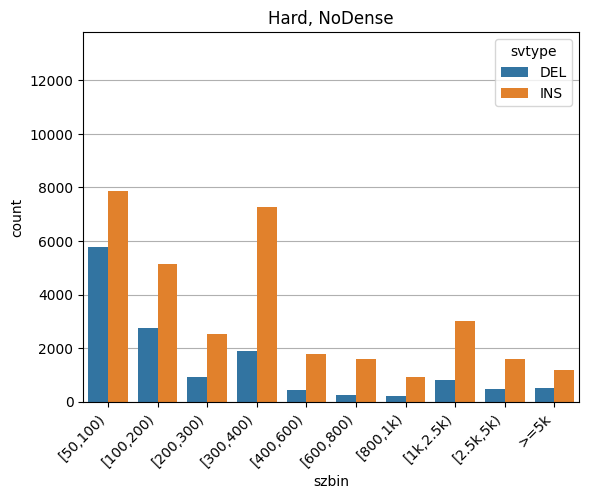

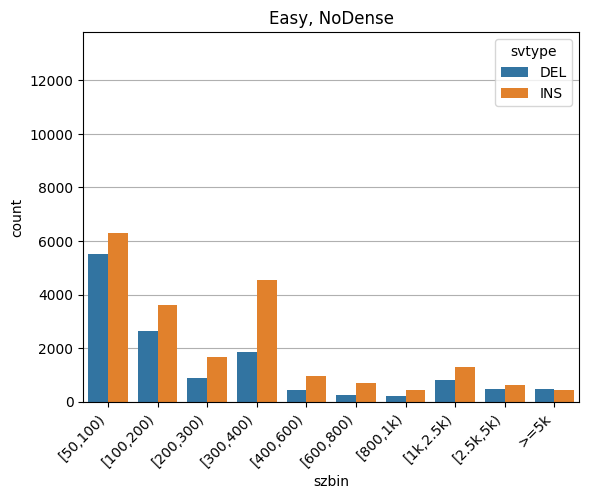

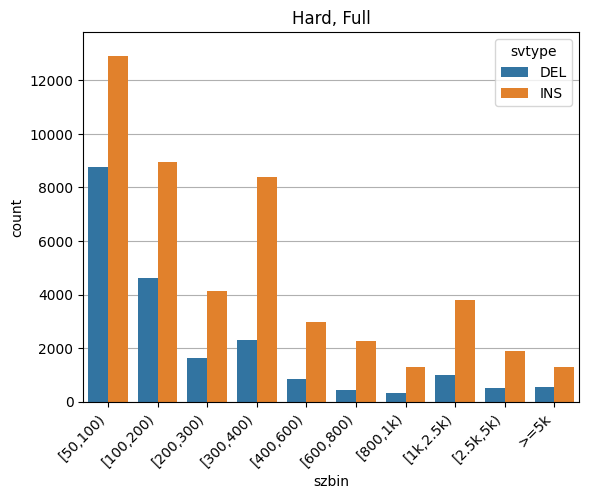

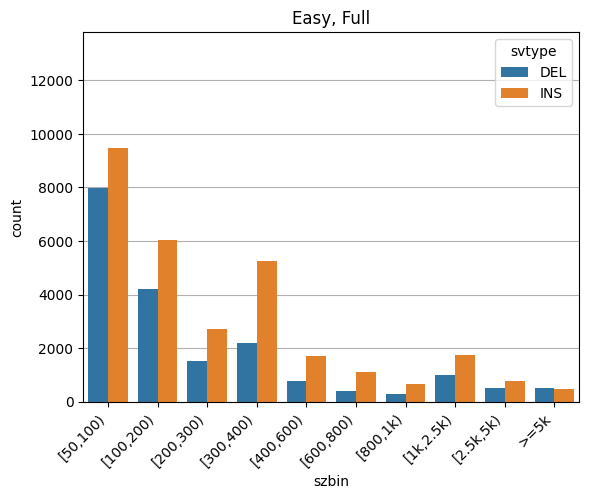

In [38]:
for i in [('Hard, NoDense', hard_nd),
          ('Easy, NoDense', easy_nd),
          ('Hard, Full', hard_ful),
          ('Easy, Full', easy_ful)]:
    p = sb.countplot(data=i[1], x='szbin', hue='svtype', hue_order=['DEL', 'INS'],
                 order=truvari.SZBINS[8:], zorder=2)
    p.set(title=i[0], ylim=(0,13800))
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', zorder=1)
    plt.show()
                 